# 중간고사 예상문제 

In [1]:
import numpy as np
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
import math

In [3]:
import matplotlib.pyplot as plt 

In [4]:
tnp.experimental_enable_numpy_behavior() 

## `1`. 경사하강법과 tf.GradientTape()의 사용방법 (30점)

`(1)` 아래는 $X_i \overset{iid}{\sim} N(3,2^2)$ 를 생성하는 코드이다. (10점)

In [55]:
tf.random.set_seed(43052)
x= tnp.random.randn(10000)*2+3
x

<tf.Tensor: shape=(10000,), dtype=float64, numpy=
array([ 4.12539849,  5.46696729,  5.27243374, ...,  2.89712332,
        5.01072291, -1.13050477])>

함수 $L(\mu,\sigma)$을 최대화하는 $(\mu,\sigma)$를 `tf.GradeintTape()`를 활용하여 추정하라. (경사하강법 혹은 경사상승법을 사용하고 $\mu$의 초기값은 2로 $\sigma$의 초기값은 3으로 설정할 것) 

$$L(\mu,\sigma)=\prod_{i=1}^{n}f(x_i), \quad f(x_i)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{1}{2}(\frac{x_i-\mu}{\sigma})^2}$$

**hint**: $L(\mu,\sigma)$를 최대화하는 $(\mu,\sigma)$는 $\log L(\mu,\sigma)$를 역시 최대화한다는 사실을 이용할 것. 

**hint:** $\mu$의 참값은 3, $\sigma$의 참값은 2이다. (따라서 $\mu$와 $\sigma$는 각각 2와 3근처로 추정되어야 한다.) 

#### 1.풀이

In [56]:
N=10000

$\log L = \log \prod_{i=1}^{n}f(x_i) $

$= \sum^{10000}_{i=1} \big \{ -\frac{1}{2} \log(2\pi \sigma^2) - \frac{(x_i - \mu)^2}{2\sigma^2} \big \}$

$= \frac{10000}{2}\log (2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum^{10000}_{i=1} (x_i - \mu)^2$

In [57]:
y_true=(x-3)**2/2**2

In [58]:
epsilon = tnp.random.randn(N)*0.5
y=(x-3)**2/2**2+epsilon

In [59]:
x.shape, y.shape

(TensorShape([10000]), TensorShape([10000]))

In [60]:
mu_hat = tf.Variable(2.0)
sigma_hat = tf.Variable(3.0)

In [61]:
alpha=0.1

In [62]:
for epoc in range(1000):   
    with tf.GradientTape() as tape: 
        yhat = (x-mu_hat)**2/(sigma_hat**2)
        loss = tf.reduce_sum((y-yhat)**2)/N 
    slope0,slope1 = tape.gradient(loss,[mu_hat,sigma_hat]) 
    mu_hat.assign_sub(slope0 * alpha) 
    sigma_hat.assign_sub(slope1 * alpha) 

In [63]:
mu_hat, sigma_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.004977>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0002522>)

In [64]:
yhat=(x-mu_hat)**2/(sigma_hat**2)

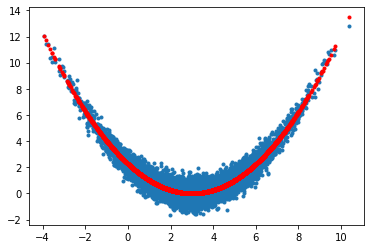

In [65]:
plt.plot(x,y,'.')
plt.plot(x,yhat,'r.')

## `2`. 회귀분석의 이론적해와 tf.keras.optimizer 이용방법 (20점)

아래와 같은 선형모형을 고려하자. 

$$y_i = \beta_0 + \beta_1 x_i +\epsilon_i.$$

이때 오차항은 정규분포로 가정한다. 즉 $\epsilon_i \overset{iid}{\sim} N(0,\sigma^2)$라고 가정한다. 

관측데이터가 아래와 같을때 아래의 물음에 답하라. 

In [28]:
x= tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])
y= tnp.array([55.4183651 , 58.19427589, 61.23082496, 62.31255873, 63.1070028 , 
              63.69569103, 67.24704918, 71.43650092, 73.10130336, 77.84988286])
# X= tnp.array([[1.0, 20.1], [1.0, 22.2], [1.0, 22.7], [1.0, 23.3], [1.0, 24.4],
#               [1.0, 25.1], [1.0, 26.2], [1.0, 27.3], [1.0, 28.4], [1.0, 30.4]])

`(1)` MSE loss를 최소화 하는 $\beta_0,\beta_1$의 해석해를 구하라. 

#### 2.1 풀이 (ref.)

In [29]:
y = y.reshape(N,1)
X = tf.stack([tf.ones(N,dtype='float64'),x],axis=1)

In [30]:
y.shape, X.shape

(TensorShape([10, 1]), TensorShape([10, 2]))

In [31]:
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.94457323],
       [2.21570461]])>

In [32]:
y_hat=9.94457323+2.21570461*x

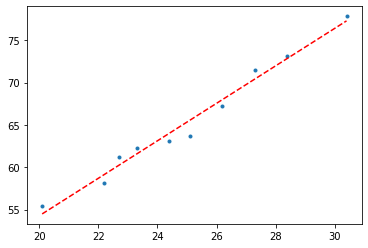

In [33]:
plt.plot(x,y,'.')
plt.plot(x,y_hat,'r--')

`(2)` 경사하강법과 MSE loss의 도함수를 이용하여 $\beta_0,\beta_1$을 추정하라. 

**주의** tf.GradeintTape()를 이용하지 말고 MSE loss의 해석적 도함수를 사용할 것.

#### 2.2 풀이 (ref.5주차 풀이3: 벡터버전, 손실함수의 도함수이용)

`-` 포인트
- $loss'(\beta)=-2X'y +2X'X\beta$
- $\beta_{new} = \beta_{old} - \alpha \times loss'(\beta_{old})$

In [155]:
N=10

In [156]:
X = tf.stack([tf.ones(N,dtype='float64'),x],axis=1)

In [157]:
y=y.reshape(N,1)

In [158]:
X.shape, y.shape

(TensorShape([10, 2]), TensorShape([10, 1]))

In [159]:
beta_hat = tnp.array([9,2]).reshape(2,1)  #b0,b1순
beta_hat

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[9],
       [2]])>

In [160]:
alpha = 0.001

In [161]:
step = slope*alpha
step

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-5.20060649e-05],
       [ 2.05065553e-06]])>

In [162]:
for epoc in range(1000):
    slope = (-2*X.T @ y + 2*X.T@ X @ beta_hat)/N
    beta_hat = beta_hat - alpha * slope

In [163]:
beta_hat

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.03545357],
       [2.25155218]])>

In [166]:
y_hat=9.03545357+2.25155218*x

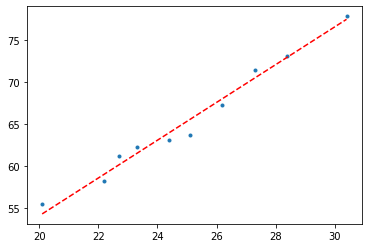

In [167]:
plt.plot(x,y,'.')
plt.plot(x,y_hat,'r--')

`(3)` `tf.keras.optimizers`의 `apply_gradients()`를 이용하여 $\beta_0,\beta_1$을 추정하라. 

#### 2.3 풀이 (ref.5주차 풀이 GradientTape + opt.apply_gradients)

`-` 포인트 
```python
## 포인트코드: 업데이트
opt.apply_gradients([(slope,beta_hat)])  ## pair의 list가 입력 
```

In [190]:
X.shape,y.shape

(TensorShape([10, 2]), TensorShape([10, 1]))

In [191]:
beta_hat = tf.Variable(tnp.array([9,2],dtype='float64').reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.],
       [2.]])>

In [192]:
alpha=0.001

In [193]:
opt = tf.keras.optimizers.SGD(alpha)

In [194]:
for epoc in range(1000): 
    with tf.GradientTape() as tape: 
        yhat = X@beta_hat
        loss = (y-yhat).T @ (y-yhat) / N 
    slope = tape.gradient(loss,beta_hat)  
    opt.apply_gradients( [(slope,beta_hat)] )

In [195]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.03545358],
       [2.25155218]])>

In [196]:
y_hat=9.03545358+2.25155218*x

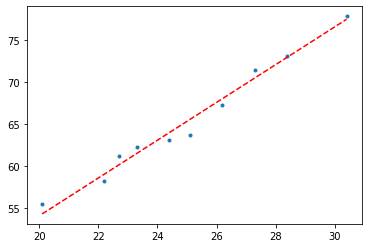

In [197]:
plt.plot(x,y,'.')
plt.plot(x,y_hat,'r--')

`(4)` `tf.keras.optimizers`의 `minimize()`를 이용하여 $\beta_0,\beta_1$을 추정하라. 

#### 2.4 풀이 (ref. 5주차 풀이6: 벡터버전, 사용자정의 손실함수 <- tf.losses.MeaSquaredError)

`-` 포인트
```python
## 포인트코드: 클래스로부터 손실함수 오브젝트 생성 (함수를 찍어내는 클래스) 
mse_fn = tf.losses.MeanSquaredError()
mse_fn(y,yhat)
```

In [198]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([10, 2]), TensorShape([10, 1]))

In [205]:
beta_hat = tf.Variable(tnp.array([9,2],dtype='float64').reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.],
       [2.]])>

In [206]:
alpha=0.001
opt = tf.keras.optimizers.SGD(alpha) 

In [207]:
mseloss_fn=tf.losses.MeanSquaredError()

In [208]:
mseloss_fn(y.reshape(-1),yhat.reshape(-1))

<tf.Tensor: shape=(), dtype=float64, numpy=0.960963785648346>

In [209]:
def loss_fn():
    yhat= X@beta_hat
    loss = mseloss_fn(y.reshape(-1),yhat.reshape(-1))
    return loss

In [210]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat) # 미분 + update 

In [211]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[9.03545358],
       [2.25155218]])>

In [196]:
y_hat=9.03545358+2.25155218*x

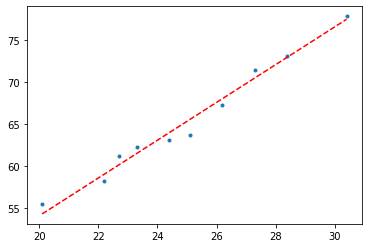

In [197]:
plt.plot(x,y,'.')
plt.plot(x,y_hat,'r--')

## `3`. keras를 이용한 풀이 (30점)

`(1)` 아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i, \quad i=0,1,\dots, 999$$

여기에서 $t_i=\frac{2\pi i}{1000}$ 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자. 

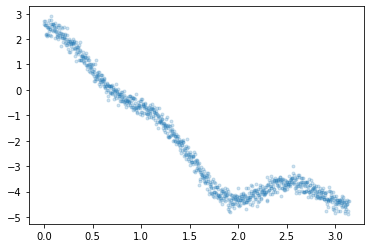

In [90]:
np.random.seed(43052)
t= np.array(range(1000))* np.pi/1000
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.2)

tf.keras를 이용하여 $\beta_0,\dots,\beta_5$를 추정하라. ($\beta_0,\dots,\beta_5$의 참값은 각각 -2,3,1,0,0,0.5 이다) 

In [96]:
X = np.stack([np.ones(1000),np.cos(1*t),np.cos(2*t),np.cos(3*t),np.cos(4*t),np.cos(5*t)],axis=1)
y = y.reshape(1000,1)

In [97]:
net = tf.keras.Sequential() # 1: 네트워크 생성
net.add(tf.keras.layers.Dense(1,use_bias=False)) # 2: add layer 
net.compile(tf.optimizers.SGD(0.1), loss='mse') # 3: compile
net.fit(X,y,epochs=30, batch_size=N) # 4: fit 

Epoch 1/30
1/1 [==============================] - 0s 92ms/step - loss: 11.7722
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 8.5134
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 6.2442
Epoch 4/30
1/1 [==============================] - 0s 10ms/step - loss: 4.6432
Epoch 5/30
1/1 [==============================] - 0s 10ms/step - loss: 3.4981
Epoch 6/30
1/1 [==============================] - 0s 12ms/step - loss: 2.6676
Epoch 7/30
1/1 [==============================] - 0s 12ms/step - loss: 2.0571
Epoch 8/30
1/1 [==============================] - 0s 10ms/step - loss: 1.6024
Epoch 9/30
1/1 [==============================] - 0s 12ms/step - loss: 1.2595
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 0.9981
Epoch 11/30
1/1 [==============================] - 0s 10ms/step - loss: 0.7968
Epoch 12/30
1/1 [==============================] - 0s 12ms/step - loss: 0.6404
Epoch 13/30
1/1 [==============================] - 0s 12ms/s

In [98]:
net.weights

[<tf.Variable 'dense_2/kernel:0' shape=(6, 1) dtype=float32, numpy=
 array([[-2.0089886 ],
        [ 2.8645215 ],
        [ 0.9796344 ],
        [ 0.0177131 ],
        [ 0.02426586],
        [ 0.50201845]], dtype=float32)>]

`(2)` 아래와 같은 모형을 고려하자. 

$$y_i \sim Ber(\pi_i), ~ \text{where} ~ \pi_i=\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$$


위의 모형에서 관측한 데이터는 아래와 같다. 

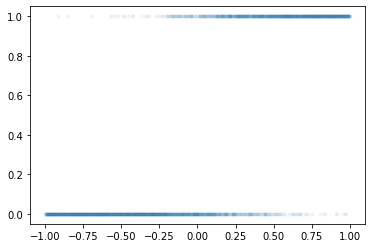

In [138]:
tf.random.set_seed(43052)
x = tnp.linspace(-1,1,2000) 
y = tf.constant(np.random.binomial(1, tf.nn.sigmoid(-1+5*x)),dtype=tf.float64) 
plt.plot(x,y,'.',alpha=0.05)

tf.keras를 이용하여 $w_0,w_1$을 추정하라. (참고: $w_0, w_1$에 대한 참값은 -1과 5이다.) 

In [139]:
x.shape, y.shape

(TensorShape([2000]), TensorShape([2000]))

In [140]:
x=x.reshape(2000,1)
x.shape, y.shape

(TensorShape([2000, 1]), TensorShape([2000]))

In [141]:
net = tf.keras.Sequential() 
net.add(tf.keras.layers.Dense(1,activation='sigmoid'))
bceloss_fn = lambda y,yhat: -tf.reduce_mean(y*tnp.log(yhat) + (1-y)*tnp.log(1-yhat))
net.compile(loss=bceloss_fn, optimizer=tf.optimizers.SGD(0.1))
net.fit(x,y,epochs=10000,verbose=0,batch_size=2000) 

In [142]:
net.weights

[<tf.Variable 'dense_13/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.9088597]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(1,) dtype=float32, numpy=array([-0.8237801], dtype=float32)>]

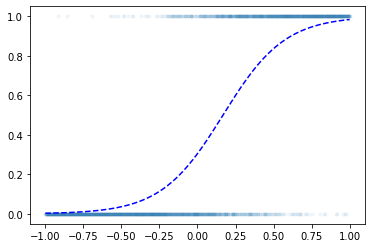

In [143]:
plt.plot(x,y,'.',alpha=0.05)
plt.plot(x,net(x),'--b')

## `4`. Piecewise-linear regression (15점) 

## `5`. 다음을 잘 읽고 참과 거짓을 판단하라. (5점)

`(1)` 적절한 학습률이 선택된다면, 경사하강법은 손실함수가 convex일때 언제 전역최소해를 찾을 수 있다.

`(2)`

`(3)`

`(4)`

`(5)`